# Real Estate Price Predictor


In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.281756,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.700517,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31cb462a50>,
      dtype=object)

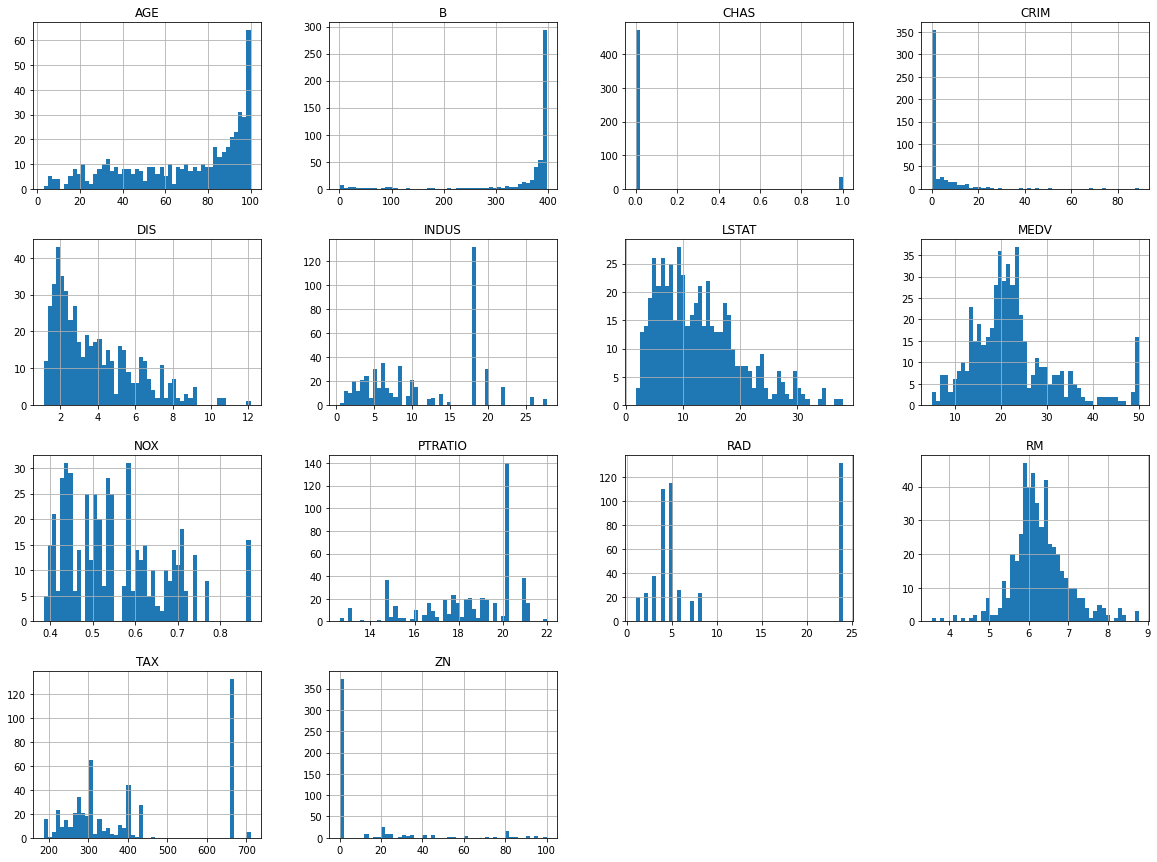

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print("row in train set:",len(train_set))
print("row in test set:",len(test_set))

row in train set: 404
row in test set: 102


# For split on basis of important factor


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]        #LOC STORE LINE OF GIVEN INDEX IN SET
    strat_test_set=housing.loc[test_index]
    

In [11]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [12]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
#95/7

In [15]:
#376/28

In [16]:
housing=strat_train_set.copy()

# Correlations

In [17]:
corr_matrix=housing.corr()

In [18]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677343
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31bcaf1490>,
      dtype=object)

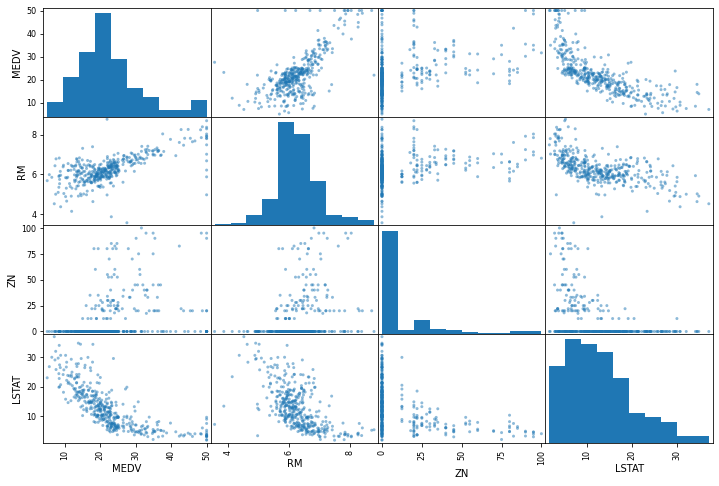

In [19]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

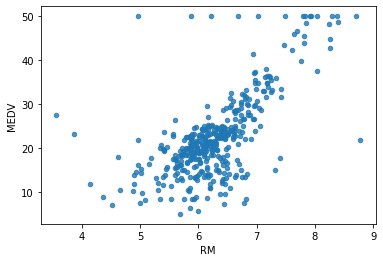

In [20]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8) 

In [21]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

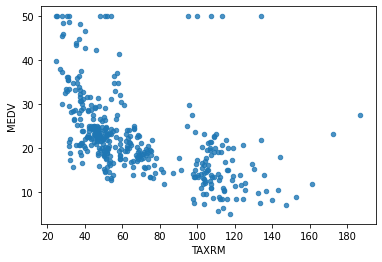

In [22]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8) 

In [23]:
housing=strat_train_set.drop("MEDV",axis=1)#last cploumn
housing_labels=strat_train_set["MEDV"].copy()


# Missing values



In [24]:
#1.remove value
#2.remove column
#3.get some value

In [25]:
a=housing.dropna(subset=["RM"])#option1 and orignal unchanged
a.shape

(400, 13)

In [26]:
housing.drop("RM",axis=1).shape#option2 orignal unchanged

(404, 12)

In [27]:
median=housing["RM"].median()
median

6.209

In [28]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [29]:
housing.shape


(404, 13)

In [30]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.274938,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710069,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## after impute

In [31]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [32]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [33]:
X=imputer.transform(housing)

In [34]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [35]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.274285,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.706566,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# #creating pipline (Staderdozation)


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [37]:
housing_num_tr=my_pipline.fit_transform(housing)

In [38]:
housing_num_tr.shape

(404, 13)

In [39]:

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
some_data=housing.iloc[:5]
some_label=housing_labels.iloc[:5]

In [41]:
preapre_data=my_pipline.transform(some_data)

In [42]:
model.predict(preapre_data)

array([22.395, 25.332, 16.668, 23.17 , 23.581])

In [43]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluate

In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)
rmse

1.2450986073718049

# # CRossValidation

In [45]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [46]:
rmse_scores

array([2.73413978, 2.88070031, 4.51386225, 2.57275203, 3.421721  ,
       2.82876734, 4.41882957, 3.35016088, 2.9811134 , 3.81981381])

In [47]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standerd deviation:",scores.std())

In [48]:
print(print_scores(rmse_scores))

Scores: [2.73413978 2.88070031 4.51386225 2.57275203 3.421721   2.82876734
 4.41882957 3.35016088 2.9811134  3.81981381]
Mean: 3.352186036746526
Standerd deviation: 0.6583459842056175
None


# Save Model

In [49]:
from joblib import dump,load
dump(model,"RealEstate.joblib")

['RealEstate.joblib']

# Testing

In [51]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_preapared=my_pipline.transform(X_test)
final_prediction=model.predict(X_test_preapared)
final_mse=mean_squared_error(Y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
final_rmse

2.904267294793619